In [622]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, RepeatedKFold, ShuffleSplit, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay

In [558]:
# meta_num = pd.read_csv('filename')
labs = meta_num[['pco2','lact','ph_min','gluc_max',
             'inr','ptt','d_dimer','plts',
             'alt', 'ast','bili', 'creat', 'bun' ,
             'wbc_max','bands','alc']]

# make labels in to separate np array
label_v2 = np.array(meta_num['cluster_label_v2'].tolist())

In [570]:
# scale each fature
scaler = StandardScaler()
labs_scaled = scaler.fit_transform(labs)

In [485]:
# comparing cross validation results on diff labels
hgb = HistGradientBoostingClassifier()
cv = ShuffleSplit(n_splits=5, test_size=0.2)

hgb = HistGradientBoostingClassifier()
scores_hgb_v2 = cross_validate(hgb, labs_scaled, label_v2.ravel(), cv=cv, scoring=('accuracy','precision','recall','roc_auc'),return_train_score=True)

In [561]:
# print model output for data v2 penalty = 5
print ('train accuracy', scores_hgb_v2['train_accuracy'].mean())
print ('train precision', scores_hgb_v2['train_precision'].mean())
print ('train recall', scores_hgb_v2['train_recall'].mean())
print ('train roc_auc', scores_hgb_v2['train_roc_auc'].mean())
print ('test accuracy', scores_hgb_v2['test_accuracy'].mean())
print ('test precision', scores_hgb_v2['test_precision'].mean())
print ('test recall', scores_hgb_v2['test_recall'].mean())
print ('test roc_auc', scores_hgb_v2['test_roc_auc'].mean())

train accuracy 0.885290964031582
train precision 0.8929145847218971
train recall 0.15680969584395005
train roc_auc 0.8466927171378584
test accuracy 0.8707212475633529
test precision 0.544733455259771
test recall 0.06401160167846282
test roc_auc 0.6790992404943975


In [586]:
# Train test split to get confusion matrix
X_train, X_test, y_train, y_test = train_test_split(labs_scaled, label_v2, test_size=0.2, random_state=42, stratify=label_v2)

In [589]:
# train/test the model
hgb = HistGradientBoostingClassifier()
hgb.fit(X_train, y_train)
y_pred = hgb.predict(X_test)

In [591]:
# compute accuracy of the model, this should be taken with a grain of salt for highly imblanced data
hgb.score(X_test, y_test)

0.8717348927875244

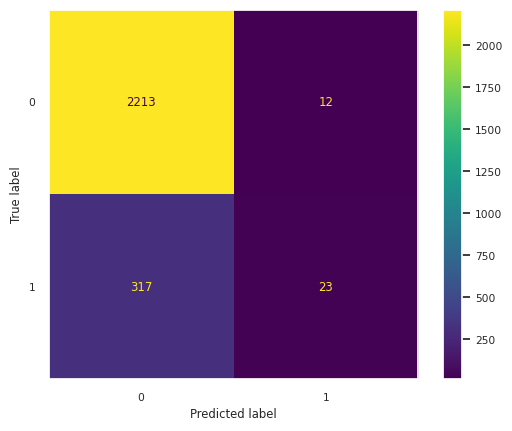

In [604]:
cm = confusion_matrix(y_test, y_pred, labels=hgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=hgb.classes_)
disp.plot()
plt.show()


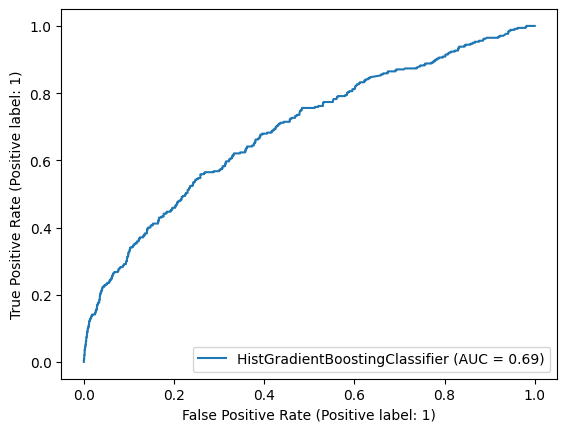

In [623]:
# roc auc
auc = RocCurveDisplay.from_estimator(hgb, X_test, y_test)
plt.show()

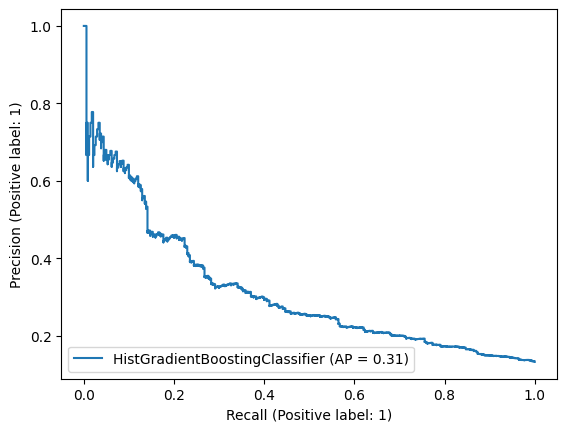

In [628]:
prec = PrecisionRecallDisplay.from_estimator(
    hgb, X_test, y_test, name="HistGradientBoostingClassifier")
plt.show()